# Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np



In [12]:
# Read data file
full_df = pd.read_csv("../Collisions.csv")
full_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [14]:
full_df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [42]:
full_df = full_df[full_df["SEVERITYCODE"]!="0"]
full_df["SEVERITYCODE"].value_counts()
severe_cases = full_df[full_df["SEVERITYCODE"]!="1"]

# Label Severity analysis

0    61954
1      334
2       14
3        2
5        1
4        1
Name: FATALITIES, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c37550>]],
      dtype=object)

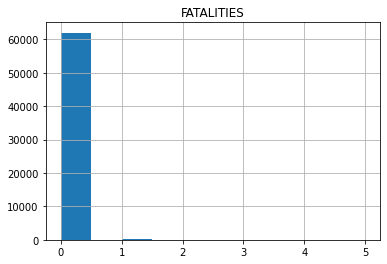

In [43]:
print(severe_cases["FATALITIES"].value_counts())
severe_cases[["FATALITIES"]].hist()

0     196968
1       2946
2        133
3         23
4          6
5          5
41         1
Name: SERIOUSINJURIES, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129a57f0>]],
      dtype=object)

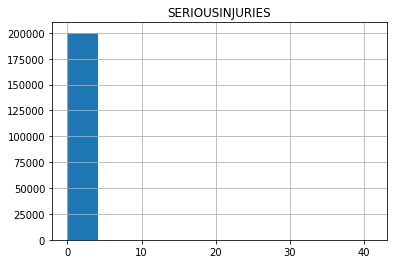

In [30]:
print(full_df["SERIOUSINJURIES"].value_counts())
full_df[["SERIOUSINJURIES"]].hist()

1     47364
2     10703
3      2734
4       817
5       274
0       236
6       100
7        40
8        12
9        10
10        6
11        5
13        2
15        1
78        1
12        1
Name: INJURIES, dtype: int64


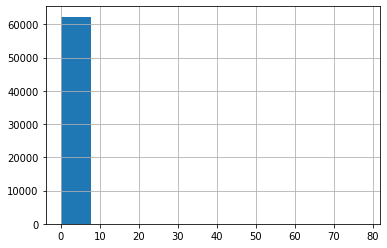

In [44]:
print(severe_cases["INJURIES"].value_counts())
severe_cases["INJURIES"].hist()

/Users/Katie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


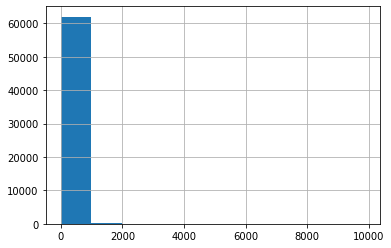

In [45]:
severe_cases["SEVERITY_SCORE"] = severe_cases["FATALITIES"]*1000 + severe_cases["SERIOUSINJURIES"]*100 + severe_cases["INJURIES"]*10
severe_cases["SEVERITY_SCORE"].hist()

# Feature analysis